<a href="https://colab.research.google.com/github/selogdata/silver-adventure/blob/main/check_the_data_set_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 확인
- data set load
- data shape
    - data columns
- data info

In [2]:
# 데이터셋 로드
ti = sns.load_dataset('titanic') # data를 `ti`라는 변수에 할당하였다.

In [6]:
# ti 데이터셋의 행과 열의 크기 확인
print(ti.shape)
# ti 데이터셋의 맨 앞 2개의 행, 맨 뒤 2개의 행을 한번에 보기 (display 함수 찾아서 사용해볼 것)
ti.head(2)
ti.tail(2)
# 데이터가 제대로 뽑혔는지 display()
display(ti.head(2), ti.tail(2)) # 마지막 값만 출력되니깐

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [9]:
# ti의 컬럼명들 확인 & 출력 => .columns (dot columns)
print(ti.columns)
# ti의 행 index 확인 & 출력 => .index (dot index)
print(ti.index)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
RangeIndex(start=0, stop=891, step=1)


In [10]:
# ti의 요약정보(non-null data 개수 & data type) 확인 
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# 확인 할 것
- 결측치 NaN Null
    - 총 데이터 개수 대비 데이터가 얼마만큼 빠져있구나
        - age
        - deck

In [14]:
# 각 컬럼별로 몇개의 NaN 값이 존재하는지 확인 (isnull & sum 사용)
ti.isnull()
ti.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# ti 변수들 중 numeric(숫자형) 변수들의 기초통계량 파악
ti.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- fare
    - 중간 14
    - max 512
        - 가격차이가 엄청나네

---

In [16]:
# 간단하게 survived의 각 변수별 데이터의 수 확인. 산 사람(1)은 몇명이고 죽은 사람(0)은 몇 명인가
ti['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [17]:
ti.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

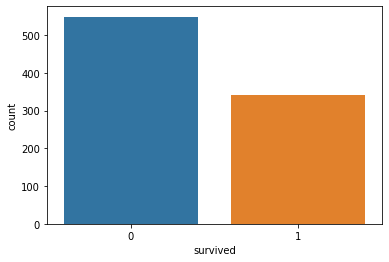

In [18]:
# survived별 사람의 수 count하여 시각화 (seaborn 사용)
sns.countplot(x='survived', data=ti)

## 변수가 어떻게 분포하고 있지?
- sns.countplot
- 변수 하나 => x 변수
- pandas 와 연동이 좋은 seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


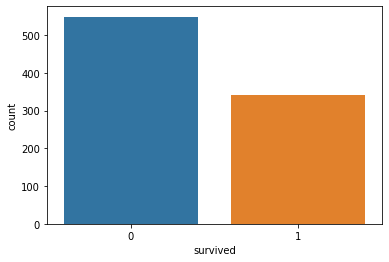

In [19]:
sns.countplot(ti.survived)

In [21]:
# deck 변수의 unique한 데이터 확인 및 출력
ti['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

## Category 데이터
- unique 분류 몇 개 있지

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


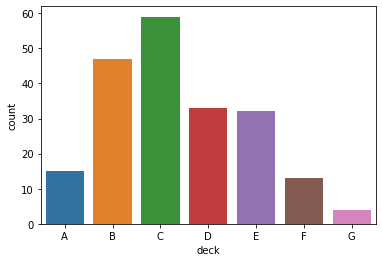

In [22]:
# deck별 사람의 수 count하여 시각화 (seaborn 사용)
sns.countplot(ti.deck)

In [23]:
ti.deck.value_counts() # 기본 내림차순 Descending

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

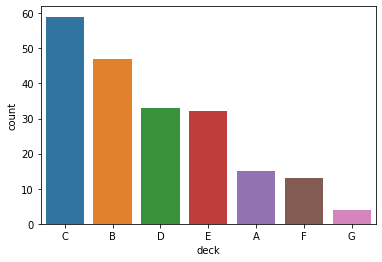

In [24]:
# 사람이 많은 deck 순서대로 countplot의 x축 순서 정렬 (order 인자를 사용해보세요! 힌트: order 인자로 value_counts의 index를 사용하세요!)
sns.countplot(x='deck', data=ti, order=ti.deck.value_counts().index)

## 순서 대로 확인
- 내림차순 index 뽑아내기

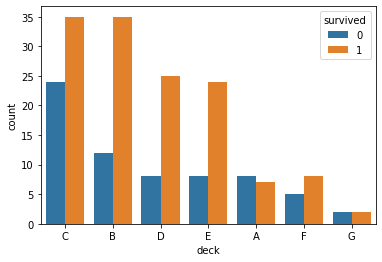

In [29]:
# deck(x)변수별로 survived(hue)한 사람의 수를 count하여 시각화 (seaborn 사용) 
sns.countplot(x='deck', hue='survived', data=ti, order=ti.deck.value_counts().index)

값이 있는 경우만 나와서
survived 가 더 많이 나온다.
NaN

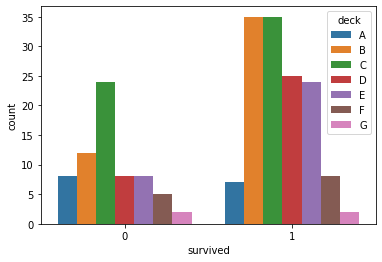

In [27]:
sns.countplot(x='survived', hue='deck', data=ti)

## 더 확인하고 싶은 정보
- 기준 값 x
- 추가 값 hue
**말하고자 하는 의도에 따라서 표현 방법이 달라진다.*

In [34]:
ti['deck'].notnull()

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: deck, Length: 891, dtype: bool

In [36]:
# ti 데이터프레임에서 deck 변수 값이 NaN이 아닌 데이터들만 뽑아서 deck_exist 라는 변수에 할당 (notnull 사용)
deck_exist = ti[ti['deck'].notnull()]
# deck_exist의 행과 열의 개수 확인
print(deck_exist.shape)
# deck_exist의 맨 앞 3개의 행, 맨 뒤 3개의 행 한번에 확인하기 (display 사용)
display(deck_exist.head(3), deck_exist.tail(3))

(203, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


기존 값에서 뽑아 온 거라
행의 index는 어쩔 수 없다 :)

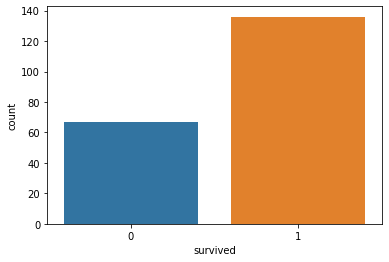

In [37]:
# deck_exist 데이터에서 survived별 사람의 수 count하여 시각화
sns.countplot(x='survived', data=deck_exist)

- 이 데이터는 어떻게 해야할까
- 유의미 하지만, 이대로 사용해서는 안 될 것 같다.
등등 판단

(688, 15)


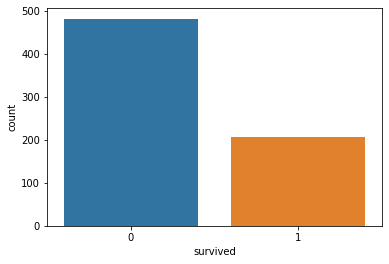

In [43]:
# ti 데이터프레임에서 deck 변수 값이 NaN인 데이터들만 뽑아서 deck_not 라는 변수에 할당 
deck_not = ti[ti.deck.isnull()]
# deck_not의 행과 열의 개수 확인
print(deck_not.shape)
# deck_not 데이터에서 survived별 사람의 수 count하여 시각화
sns.countplot(x='survived', data=deck_not)